In [7]:
import pandas as pd

In [8]:
import numpy as np

In [9]:
from sklearn.metrics import  silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

In [10]:
df = pd.read_csv("h3-1.csv", header = None, sep=" ")

In [32]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.7,4.4,1.5,0.4
1,5.5,4.2,1.4,0.2
2,5.2,4.1,1.5,0.1
3,5.8,4.0,1.2,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
145,4.5,2.3,1.3,0.3
146,6.0,2.2,5.0,1.5
147,6.2,2.2,4.5,1.5
148,6.0,2.2,4.0,1.0


In [12]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [13]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.7,4.4,1.5,0.4
1,5.5,4.2,1.4,0.2
2,5.2,4.1,1.5,0.1
3,5.8,4.0,1.2,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
145,4.5,2.3,1.3,0.3
146,6.0,2.2,5.0,1.5
147,6.2,2.2,4.5,1.5
148,6.0,2.2,4.0,1.0


In [14]:
#Checking if there are any null values in the dataset
null_count=df.isnull().sum()
null_count

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [34]:
null_count.describe()

count    4.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
dtype: float64

In [70]:
# normalize data values
for col in df.columns[:-1]:
    df[col] = df[col] / df[col].max()

In [71]:
#Removing the colums which contain only zeros
non_zero_df = df.loc[:, (df != 0).any(axis=0)]
non_zero_df

,sepal_length,sepal_width,petal_length,petal_width
0,0.721519,1.000000,0.217391,0.4
1,0.696203,0.954545,0.202899,0.2
2,0.658228,0.931818,0.217391,0.1
3,0.734177,0.909091,0.173913,0.2
4,0.683544,0.886364,0.246377,0.4
...,...,...,...,...
145,0.569620,0.522727,0.188406,0.3
146,0.759494,0.500000,0.724638,1.5
147,0.784810,0.500000,0.652174,1.5
148,0.759494,0.500000,0.579710,1.0


In [72]:
#Scaling the dataset and converting it into an n-dimensional numpy array.
np_df = (non_zero_df.to_numpy(copy= True))/255

In [73]:
np_df

array([[0.00282949, 0.00392157, 0.00085251, 0.00156863],
       [0.00273021, 0.00374332, 0.00079568, 0.00078431],
       [0.00258129, 0.00365419, 0.00085251, 0.00039216],
       [0.00287913, 0.00356506, 0.00068201, 0.00078431],
       [0.00268057, 0.00347594, 0.00096618, 0.00156863],
       [0.00268057, 0.00347594, 0.00073885, 0.00156863],
       [0.00382229, 0.00338681, 0.0038079 , 0.00862745],
       [0.00392157, 0.00338681, 0.0036374 , 0.00784314],
       [0.00253165, 0.00338681, 0.00107985, 0.00156863],
       [0.00282949, 0.00338681, 0.00096618, 0.00117647],
       [0.00253165, 0.00338681, 0.00090935, 0.00078431],
       [0.00253165, 0.00338681, 0.00085251, 0.00117647],
       [0.00253165, 0.00329768, 0.00085251, 0.00156863],
       [0.00268057, 0.00329768, 0.00085251, 0.00078431],
       [0.00263093, 0.00329768, 0.00085251, 0.00078431],
       [0.00357409, 0.00320856, 0.00346689, 0.00980392],
       [0.00248201, 0.00320856, 0.00079568, 0.00078431],
       [0.00228345, 0.00320856,

In [74]:
#time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
fit_data = tsne.fit_transform(np_df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.016s...
[t-SNE] Computed neighbors for 150 samples in 0.468s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.000590
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.135429
[t-SNE] KL divergence after 300 iterations: 0.116260


In [75]:
df1 = fit_data

In [76]:
def Pred(data, centroids, k =2):
  cluster = np.empty(len(df))
  for i in range(len(data)):
    min_distance = np.Inf
    for cluster in range(k):
      distance = np.linalg.norm(data[i]-centroids[cluster])
      if distance < min_distance:
        min_distance = distance
        cluster[i] = cluster
  return cluster

In [77]:
def Move_Centroid(centroids, k, attributes, instances, cluster, data):
  previous_centroids = centroids.copy()
  #current_centroids = np.empty(initial_centroids.shape)
  for cluster in range(k):
    for column in range(attributes):
      sum = 0.0
      count = 0.0
      average =None
      for row in range(instances):
        if(cluster == cluster[row]):
          sum += data[row, column]
          count+=1
          if count >0:
            average = sum/ count
        centroids[cluster, column] = average
  return previous_centroids, centroids

In [78]:
def recursion(fit_data, k):  
  initial_centroids = fit_data[np.random.choice(fit_data.shape[0], size = k, replace= False)]
  attributes = fit_data.shape[1]
  instances = len(df)
  centroids_the_same = False
  current_centroids = np.empty(initial_centroids.shape)
  previous_centroids = initial_centroids
  Initial_cluster = Pred(fit_data, initial_centroids,k)
  previous_cluster = Initial_cluster
  new_cluster = np.empty(Initial_cluster.shape)
  max_iterations = 50
  scores =[]
  score = 0.0
  while max_iterations > 0 and (not(centroids_the_same)):
    previous_centroids, current_centroids = Move_Centroid(initial_centroids,k,attributes, instances,Initial_cluster, fit_data)
    centroids_the_same = (np.array_equal(previous_centroids,current_centroids) and score > 0.035)
    new_cluster=cluster(fit_data, current_centroids, k)
    score = silhouette_score(fit_data, new_cluster)
    previous_cluster = new_cluster
    max_iterations -=1
  print(new_cluster)
  return new_cluster

In [79]:
new_cluster = recursion(fit_data, k=3)

[2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 1. 1. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 0. 2. 2. 1. 1. 1. 1. 1. 1.
 0. 0. 2. 2. 2. 2. 2. 1. 1. 1. 1. 0. 0. 0. 2. 2. 2. 2. 2. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 2. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 2. 0. 0. 0. 0.]


In [80]:
label = pd.read_csv("output.txt")

In [81]:
label.to_numpy()

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
    

In [83]:
df3 = new_cluster

In [84]:
df3 = df3.astype(int)

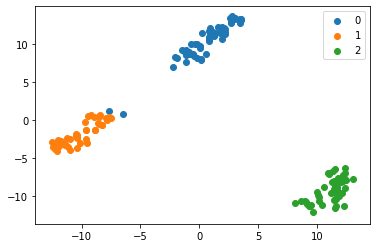

In [85]:
#Getting unique labels
u_labels = np.unique(df3)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df1[df3 == i , 0] , df1[df3 == i , 1] , label = i)
plt.legend()
plt.show()